In [183]:
import matplotlib.pyplot as plt
import numpy as np
import header as h

import scipy as sp

from scipy.optimize import curve_fit
from scipy.stats import maxwell
from scipy.stats import norm

In [162]:
def get_power_data( file ):
    power = []
    with open( file , 'r') as myfile:
        while( True ):
            #Getting file data line-by-line.
            data = myfile.readline()
            #Check end of file.
            if len(data) == 0:
                break
            power.append(float(data[:len(data)-1]))
    return power

def TheroreticalFreq(power, e_sqrd_radius = 50.0e-6, transition_wavelength = 461.0e-9 , laser_wavelength = 1064.0e-9, mass = 87*1.66e-27, transition_linewidth = 30.5e6):
    P_0 = power
    w_0 = e_sqrd_radius
    omega_0 = 2*pi*c/transition_wavelength
    omega   = 2*pi*c/laser_wavelength
    m   = mass*amu2kg
        
    I_0 = 2*P_0/(pi*w_0**2)
    Gamma = 2*pi*transition_linewidth

    co_rotating      = Gamma / (omega_0 - omega)
    counter_rotating = Gamma / (omega_0 + omega)
    contants = 3*pi*c**2/(2*omega_0**3)

    U_0 = I_0 * contants * (co_rotating + counter_rotating)

    return  U_0

def norm_fit(x, a, b):
    return norm.pdf(x, a, b)

def max_bolt_pdf(x, m, T):
    kT = 1.380469e-23 * T #J k^-1
    return 4.0*np.pi*x**2 * np.sqrt( m/ (2*np.pi*kT) ) * np.exp(-m/(2*kT) * x**2)

def get_particle_velocity(x):
    return np.sqrt(sum([i**2 for i in x]))
    
            

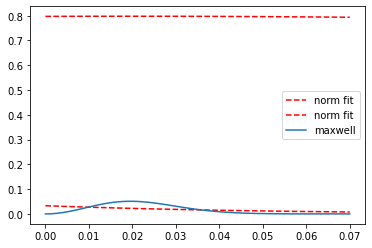

In [240]:


x = np.linspace(0, 0.07, 100)

m = 87*1.66e-27
T = 2.0e-6

y = max_bolt_pdf(x, m, T)

popt, pcov = curve_fit(norm_fit, x, y, [0.01, 0.02])

plt.plot(x, norm_fit(x, popt[0], popt[1]), "r--", label = "norm fit")
plt.plot(x, norm_fit(x, 0.019, 0.5), "r--", label = "norm fit")
plt.plot(x, y, label = "maxwell")
plt.legend()
plt.show()

/Users/brianbostwick/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

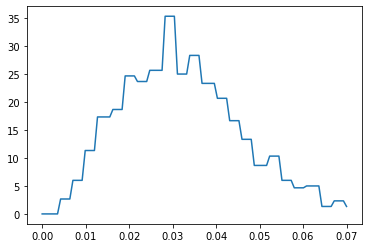

In [208]:
fileVel = "/Users/brianbostwick/Mirror/Cambridge/QMBP_Lab/DipoleTrap_EvapCooling/EvapData/vel_distro02.txt"

VelData = h.get_particle_data( fileVel )[2]

data_raw = [get_particle_velocity(i) for i in VelData[0]]

data_hist = np.histogram(data_raw, bins = 25)
distro_data = sp.stats.rv_histogram(data_hist)

print(distro_data)

# popt, pcov = curve_fit(max_bolt_pdf, x, distro_data)
# plt.hist(data_raw, bins = 25)
plt.plot(x, distro_data.pdf(x))
plt.plot(data_hist)
# plt.plot(x, max_bolt_pdf(x,popt[0],popt[1]))
plt.show()